In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde

In [2]:
un_gdp=pd.read_csv('..//data//gdp_percapita.csv.csv')

In [3]:
print(un_gdp)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]


4.b Take a look at the first rows to familiarize yourself with what is contained in this dataset.



In [4]:
un_gdp.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


4.c Take a look at the last rows to familiarize yourself with what is contained in this dataset.



In [5]:
un_gdp.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [6]:
un_gdp.shape

(8219, 4)

5.b What are the data types of each column?



In [7]:
un_gdp.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

 6.Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

 

In [8]:
un_gdp=un_gdp.drop(columns=['Value Footnotes'])

In [9]:
un_gdp=un_gdp.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

7.a How many countries have data for all years?



In [10]:
countries_all_data= un_gdp['Country'].value_counts()[un_gdp['Country'].value_counts()==34]

In [11]:
countries_all_data=countries_all_data.to_frame()

In [12]:
countries_all_data.shape

(228, 1)

ANS- 228 countries have data for all years.



7.b Which countries are missing many years of data?

In [13]:
countries_missing_data = un_gdp['Country'].value_counts()[un_gdp['Country'].value_counts() < 34]

In [14]:
countries_missing_data=countries_missing_data.to_frame()

In [15]:
countries_missing_data.shape

(19, 1)

ANS -  19 countries are missing years data.

8.a create histogram plot to show the distribution of GDP per capita for the year 2020.



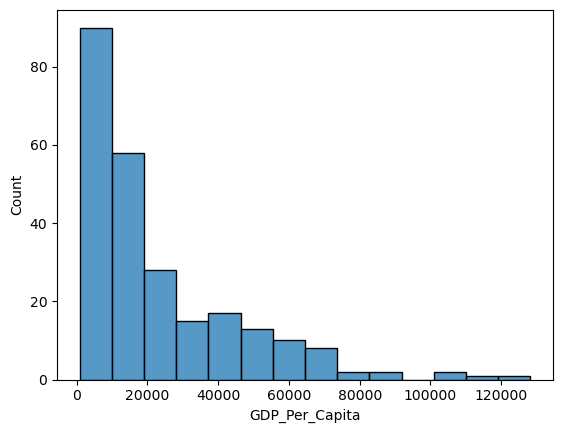

In [16]:
un_gdp_2020=un_gdp[un_gdp['Year']==2020]
sns.histplot(un_gdp_2020['GDP_Per_Capita']);

The histogram has a right-skewed distribution.About 90+ countries have a gdp upto 10,000.Only a small number of countries(less than 10)have a gdp between 90000 and 120000.	The bars directly show how many data points fall into a given range. This makes it easy to see the exact counts and identify potential gaps

8.b Create Density plot to show the distribution of GDP per capita for the year 2020.



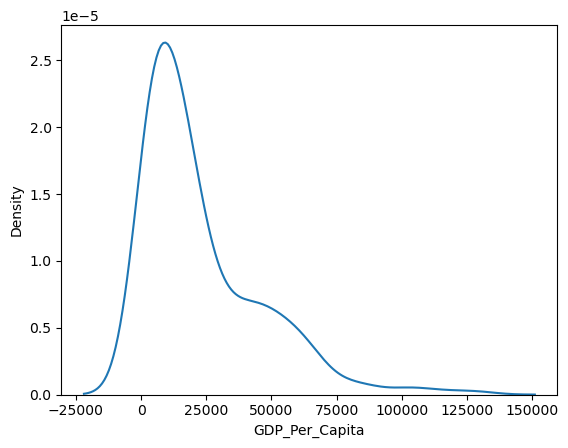

In [17]:
sns.kdeplot(un_gdp_2020['GDP_Per_Capita']);

The smooth curve provides a better sense of the overall shape of the distribution, making it easier to identify the mode(s) and overall skewness without the visual noise of discrete bins.

8.c create box plot to show the distribution of GDP per capita for the year 2020.




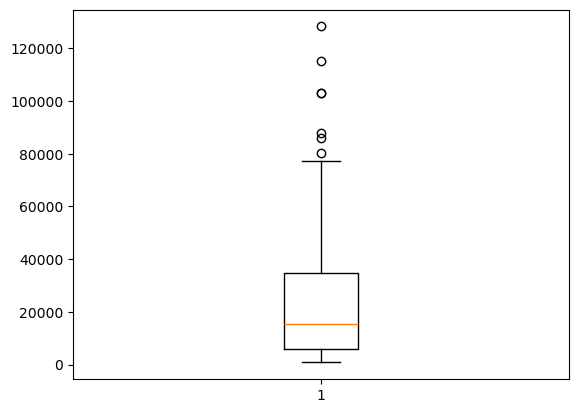

In [18]:
plt.boxplot(un_gdp_2020['GDP_Per_Capita']);


The orange line inside the box represents the median GDP per capita, which appears to be around 16,000.This indicates that half of the countries have a GDP per capita below this value, and half have a GDP per capita above it. The lower whisker is very short, ending near the minimum value. The upper whisker extends to around 80,000.

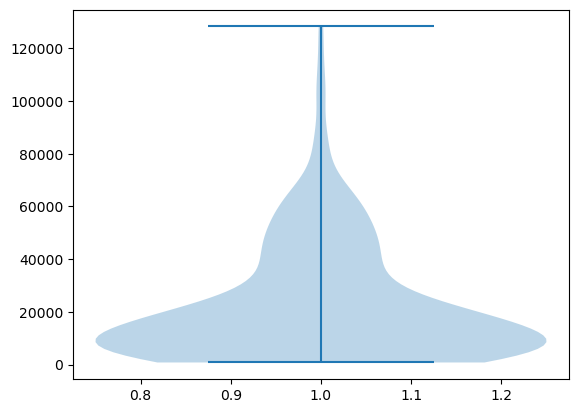

In [19]:
plt.violinplot(un_gdp_2020['GDP_Per_Capita']);

The histogram uses discrete bars to show the frequency of data within specific ranges (bins). This provides a raw count and can be influenced by the choice of bin size.The density plot (Kernel Density Estimate or KDE) presents a smooth, continuous curve that estimates the probability density function of the data. It's essentially a smoothed histogram and less affected by bin selection, making it better for observing the overall shape of the distribution, especially the presence of multiple peaks (multimodality).The boxplot is a concise summary, displaying key summary statistics: the median (central line), the interquartile range (IQR, the box), and whiskers extending to the minimum/maximum values within a certain range (typically 1.5 * IQR). It is excellent for comparing central tendency and spread across multiple groups and quickly identifying potential outliers.Violin Plot	Offers the richest view by combining summary stats with the full density distribution. It reveals aspects of data dispersion and shape, such as bimodality, which are entirely missed by the boxplot alone.

9. What was the median GDP per capita value in 2020?

median_gdp_per_capita is  around 160000

10.a For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [20]:
years_of_interest=[1990,2000,2010,2020]
gdp_decades=un_gdp[un_gdp['Year'].isin(years_of_interest)]

10.b Create 4 boxplots to compare each decade.

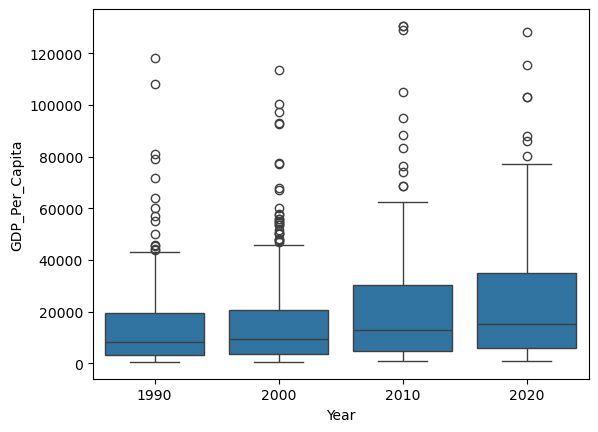

In [21]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita');

10.c Create 4 barplots to compare each decade.

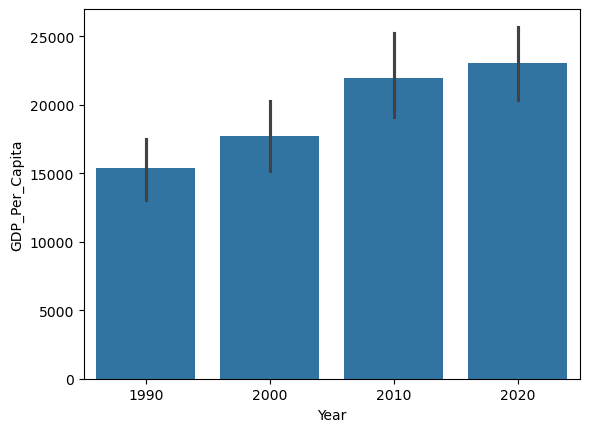

In [22]:
sns.barplot(data=gdp_decades,x='Year', y='GDP_Per_Capita');

In 1990, the average GDP per capita was approximately 15000.
In 2000 the average GDP per capita increased to just over 170000.
In 2010 ,There was a more significant increase, with the average reaching around 22000.
In 2020, The average continued to rise, reaching approximately 23000.
The height of each bar in the chart is an average value, like the average GDP per capita for all the countries in that specific year. However, this average is just one number, and the actual GDP per capita for each country is different. The error bars are the black lines that extend up and down from the top of each bar. 
The longer the error bar, the more spread out or variable the data is. This means the average for that year is a less precise representation of the data, and there's a wider range of possible values for the true average. The shorter the error bar, the more concentrated the data is around the average, and the more confident you can be in that average value. This means  Some countries had a very high GDP per capita, while others had a very low one, creating a wider range of values. 

10.d Create a scatterplot to compare each decade.


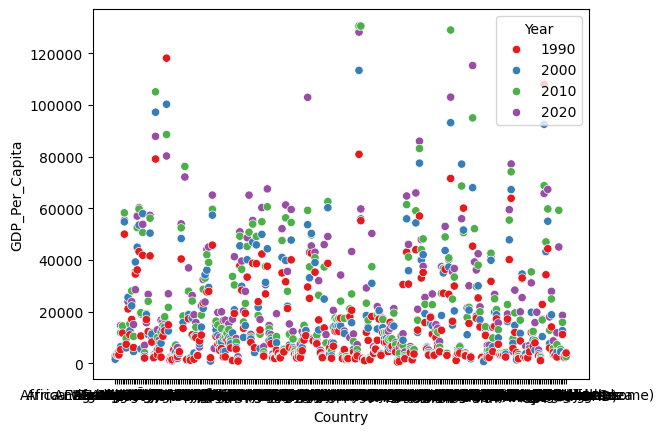

In [23]:
sns.scatterplot(x='Country', y='GDP_Per_Capita', hue='Year', data=gdp_decades, palette='Set1');

The red data points for 1990 are more clustered together, with fewer points exceeding a GDP per capita of 60000.
The green data points for 2010 and purple data points for 2020 have the widest vertical spread, with several countries reaching GDP per capita values well over 120000. Scatterplot is excellent for visualizing the raw data and seeing if there is any visible pattern, such as a positive or negative relationship between the variables.

10.e A scatterplot with a trend line overlaid (custom-linear-regression-fit-seaborn)  

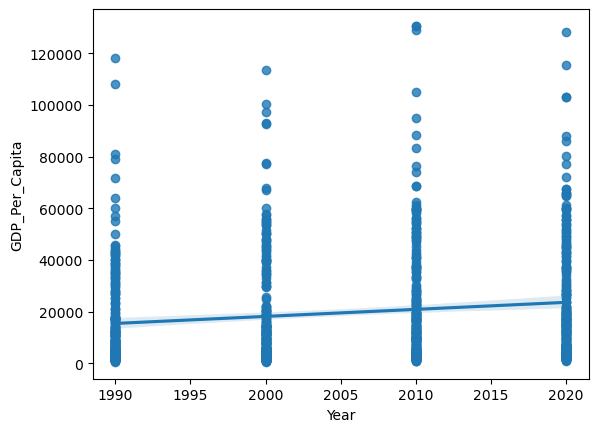

In [24]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades);

The trend line in the plot has a positive slope, which indicates that, on average, the GDP per capita has increased from 1990 to 2020.For all four years, the majority of the data points are clustered at the bottom of the plot, primarily below a GDP per capita of $40,000. This suggests that in each of the decades analyzed, a large number of countries still have relatively low GDP per capita values, even as the global average and top values increase.

10.f Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

The boxplot highlights the spread of the data, the median values, and the presence of outliers, making it useful for understanding how unevenly wealth is distributed across nations. However, a boxplot makes it difficult to read or compare the exact average GDP values for each decade.

The barplot, on the other hand, clearly displays the average GDP growth trend over the years. It hides the variation within the data and does not show the presence of outliers, giving only a summarized view.

The regression plot effectively illustrates the overall trend and correlation between time and GDP per capita. However, when many data points are plotted together, the chart appears cluttered, making it harder to interpret individual country values.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [25]:
result = (
    gdp_decades[gdp_decades['GDP_Per_Capita'] > 100000].sort_values('Year')
)

In [26]:
result

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
964,Brunei,2000,100323.440022
4446,Luxembourg,2000,113436.588273
751,Bermuda,2010,105121.639689
4436,Luxembourg,2010,130620.266278
4470,"Macao SAR, China",2010,130596.059759
6129,Qatar,2010,129045.005599
3493,Ireland,2020,102989.787335
4426,Luxembourg,2020,128256.560341


ANS - Brunei and United Arab Emirates in 1990

12.a  Which country had the highest GDP per capita in 2020?

In [27]:
data_2020= un_gdp[un_gdp['Year']==2020]

In [28]:
max_gdp=data_2020['GDP_Per_Capita'].max()

In [29]:
result= data_2020[data_2020['GDP_Per_Capita']==max_gdp]

In [30]:
result

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


ANS - Luxembourg

12.b Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [31]:
country_luxembourg= un_gdp[un_gdp['Country']=='Luxembourg']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

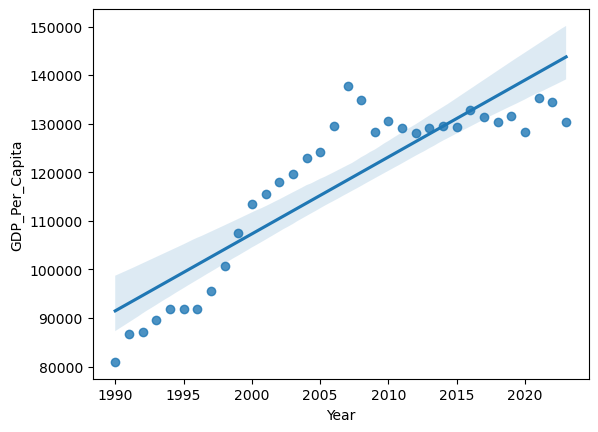

In [32]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=country_luxembourg)

GDP per capita has generally risen year by year.Some recent years appear to have plateaued or even slightly decreased compared to the steep rise in earlier years.

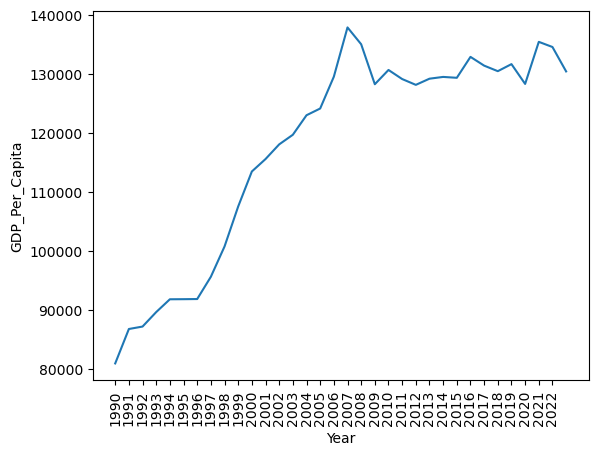

<Figure size 6600x3000 with 0 Axes>

In [33]:
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_luxembourg)
plt.xticks(np.arange(1990,2023))
plt.xticks(rotation=90)
plt.figure(figsize=(66, 30));

13.a Which country had the lowest GDP per capita in 2020? 

In [34]:
min_gdp=data_2020['GDP_Per_Capita'].min()

In [35]:
result= data_2020[data_2020['GDP_Per_Capita']==min_gdp]

In [36]:
result

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


ANS - Burundi

13.b Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [37]:
country_burundi= un_gdp[un_gdp['Country']=='Burundi']

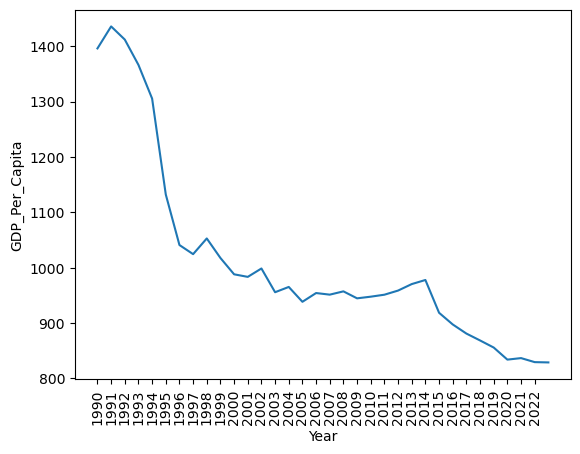

<Figure size 6600x3000 with 0 Axes>

In [38]:
sns.lineplot(x='Year', y='GDP_Per_Capita', data=country_burundi)
plt.xticks(np.arange(1990,2023))
plt.xticks(rotation=90)
plt.figure(figsize=(66, 30));

The overall trend for Burundi's GDP per capita from 1990 to 2022 is a clear, long-term decline

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [39]:
years_of_interest=[1990,2020]
filtered_df=un_gdp[un_gdp['Year'].isin(years_of_interest)]

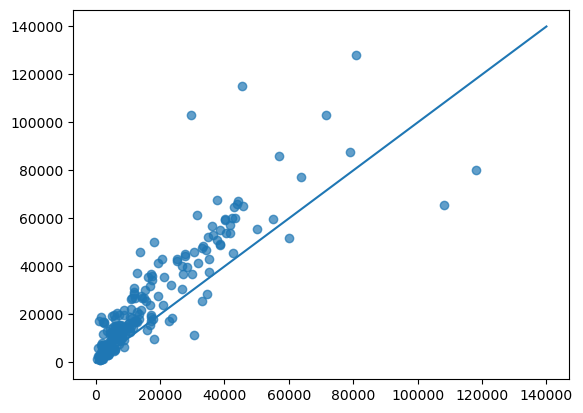

In [40]:
comparison_df = filtered_df.pivot(index='Country', columns='Year', values='GDP_Per_Capita')
comparison_df.columns = ['gdp_1990', 'gdp_2020']
plt.scatter(comparison_df['gdp_1990'], comparison_df['gdp_2020'], alpha=0.7)
plt.plot([0, 140000], [0, 140000]);


The 45-degree line is a line that shows "GDP per Capita (2020)" is exactly the same as the "GDP per Capita (1990)." Think of this line as the "no change" line.
For any dot located above the 45-degree line, the value on the y-axis is greater than the value on the x-axis. This shows that the country experienced economic growth over that period. The farther the dot is from the line, the greater the growth was.
For any dot located below the 45-degree line, the value on the x-axis is greater than the value on the y-axis.
 This dot represents a country where the GDP per capita in 2020 was lower than it was in 1990.
For any dot located exactly on the 45-degree line,there was no change in GDP per capita between 1990 and 2020. Dots very close to the line indicate very little change.
The vast majority of data points are above the 45-degree line.  For most countries, GDP per capita was higher in 2020 than it was in 1990, demonstrating a general trend of global economic growth over the 30-year period

The closer proximity of the lower cluster to the line suggests less dramatic change in GDP per capita between 1990 and 2020 for those countries. The upper cluster being further from the line reflects rapid GDP per capita growth in wealthier countries.

Bonus question 2:  Which countries had lower GDP per capita in 2020 than in 1990?


In [41]:
left = un_gdp[un_gdp['Year'] == 1990].rename(columns={'GDP_Per_Capita': 'GDP_1990', 'Year': 'Year_1990'})
right = un_gdp[un_gdp['Year'] == 2020].rename(columns={'GDP_Per_Capita': 'GDP_2020', 'Year': 'Year_2020'})
self_join = pd.merge(left, right, on='Country')
countries_low_gdp_in2020than1990= self_join[self_join['GDP_2020'] < self_join['GDP_1990']]


In [42]:
countries_low_gdp_in2020than1990

,Country,Year_1990,GDP_1990,Year_2020,GDP_2020
10,Aruba,1990,34579.220640,2020,28521.688852
16,Barbados,1990,16976.761648,2020,15749.038017
27,Brunei,1990,118163.683198,2020,80280.897948
30,Burundi,1990,1396.077627,2020,833.920257
37,Central African Republic,1990,1481.252551,2020,1136.570530
44,Congo,1990,8699.526839,2020,6350.509134
49,Dem. Rep. Congo,1990,2172.001597,2020,1277.632863
71,Fragile and conflict affected situations,1990,6062.707946,2020,5271.014406
73,Gabon,1990,23884.810700,2020,18681.484074
84,Haiti,1990,3946.365646,2020,3229.475544


In [43]:
countries_low_gdp_in2020than1990.shape

(24, 5)

 ANS - Total 24 countries had gdp in 2020 less than gdp in 1990.

14.a Read in the internet use dataset into a DataFrame named `internet_df`

internet_df = pd.read_csv("C:\\Users\\91983\\Documents\\NSS\\python\\projects\\data\\internet_use_csv\\internet_use.csv.csv", 
                          on_bad_lines='skip',  # New parameter replacing error_bad_lines=False
                          # warn_bad_lines parameter has been removed in newer pandas versions
                          quotechar='"',        # Specify quote character
                          escapechar='\\',      # Specify escape character
                          delimiter=',') 

In [44]:
internet_df=pd.read_csv("..//data//internet_use.csv.csv",nrows=6083)

In [45]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


14.b Take a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [46]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [47]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [48]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [49]:
internet=internet_df.drop(columns=['Value Footnotes'])

In [50]:
internet=internet.rename(columns={'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'})

In [51]:
internet

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?


In [52]:
year_value_counts=internet['Year'].value_counts()

In [53]:
year_value_counts=year_value_counts.to_frame()

In [54]:
year_value_counts.sort_values('Year')

,count
Year,
1990,226
1991,39
1992,50
1993,66
1994,92
1995,141
1996,177
1997,188
1998,195


ANS - The onservations per year vary each year.Not all countries have data fpr all the years.

17. What is the first year to have a non-zero internet users percentage value?

In [55]:
first_nonzero_internet_users_per_value=internet.loc[(internet['Internet_Users_Pct']>0)][['Year']].sort_values('Year').head(1)

In [56]:
first_nonzero_internet_users_per_value

,Year
1570,1990


ANS - year 1990 was the first year to have a non-zero internet users percentage value.

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [57]:
my_list=[2000,2014]

In [58]:
internet_2000_2014=internet.loc[internet['Year'].isin(my_list)]

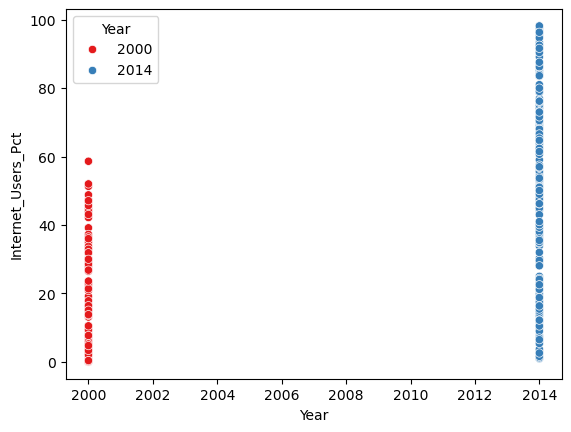

In [59]:
sns.scatterplot(x='Year',y='Internet_Users_Pct',hue='Year',data=internet_2000_2014,palette='Set1');

ANS -  Substantial growth in internet usage from 2000 to 2014. In 2000, the percentage of internet users was  a maximum around 60%, while by 2014, many entities had percentages approaching 100%.

19. For how many countries was the percentage of internet users below 5% in 2014?

In [60]:
countries_below5per_internetusers=internet.loc[(internet['Year']==2014) & (internet['Internet_Users_Pct']<5.0)]

In [61]:
countries_below5per_internetusers.shape

(10, 3)

ANS - 10 countries had percentage of internet Users below 5% in 2014.

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [62]:
gdp_and_internet_use=pd.merge(un_gdp,internet,on=['Country','Year'],how='left')

In [63]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,17.6


In [64]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8214,Zimbabwe,1994,3965.730986,0.001739
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,0.000000


21.a  Find the three countries with the highest internet users percentage in 2014.

In [65]:
countries_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values('Internet_Users_Pct',ascending=False).head(3)

In [66]:
countries_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3193,Iceland,2014,57981.199448,98.1580
747,Bermuda,2014,92298.387811,96.8000
5547,Norway,2014,84753.668395,96.3005


ANS - Iceland,Bermuda,Norway are the three countries with the highest internet users percentage in 2014.

21.b Use a seaborn to compare how the GDP per capita has changed over time for these three countries.

In [67]:
my_list=['Iceland','Bermuda','Norway']

In [68]:
iceland_bermuda_norway=gdp_and_internet_use.loc[gdp_and_internet_use['Country'].isin(my_list)]

In [69]:
iceland_bermuda_norway

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
738,Bermuda,2023,98041.688721,NaN
739,Bermuda,2022,98057.447098,NaN
740,Bermuda,2021,92276.234605,NaN
741,Bermuda,2020,87894.401174,NaN
742,Bermuda,2019,94755.432811,NaN
...,...,...,...,...
5567,Norway,1994,64373.901096,4.152450
5568,Norway,1993,61626.115045,2.783990
5569,Norway,1992,60278.978538,2.216370
5570,Norway,1991,58535.572877,1.407400


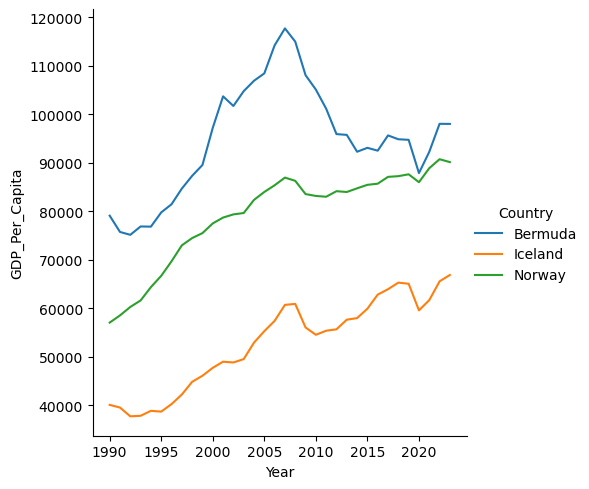

In [70]:
sns.relplot(
    data=iceland_bermuda_norway,
    x='Year',
    y='GDP_Per_Capita',
    hue='Country',
    kind='line'
)
figsize=(14,6)

21.c What do you notice?
ANS - Bermuda: Among the three, it shows the highest  GDP per capita across the period — consistent with its offshore financial sector and small population. Norway: Exhibits steady high levels and growth, supported by oil & gas revenues and prudent sovereign-wealth saving. This explains sustained elevated per-capita levels. Iceland: The strong dip around 2008 and recovery afterward are consistent with Iceland’s banking collapse and subsequent stabilization programs.

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [71]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

Text(0, 0.5, 'Internet Users Percentage (%)')

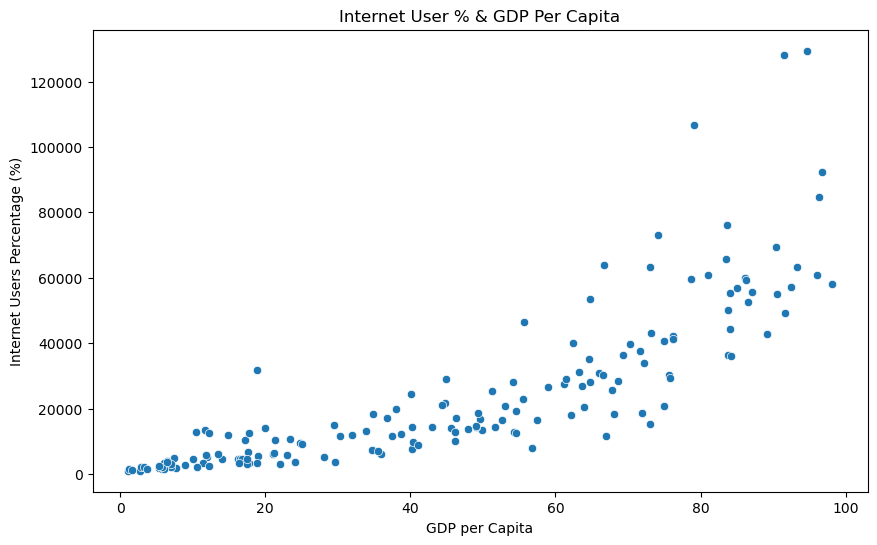

In [76]:


plt.figure(figsize=(10,6))
sns.scatterplot(x='Internet_Users_Pct',y= 'GDP_Per_Capita',data = gdp_and_internet_use_2014)
plt.title('Internet User % & GDP Per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Internet Users Percentage (%)')
  



In [ ]:
ANS- There exists a positive correrelation between GDP_Per_Capita and Internet_Users_percentage.

24. 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [73]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(
    gdp_and_internet_use_2014['GDP_Per_Capita'], 
    3,labels=['Low','Medium','High'] ,
    duplicates='drop'
);

C:\Users\91983\AppData\Local\Temp\ipykernel_8272\1537258390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(


In [74]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
9,Afghanistan,2014,3017.942544,7.0000,Low
33,Africa Eastern and Southern,2014,4052.851526,NaN,Low
67,Africa Western and Central,2014,4816.917355,NaN,Low
101,Albania,2014,12788.747231,54.3000,Medium
135,Algeria,2014,15073.762940,29.5000,Medium
...,...,...,...,...,...
8074,Virgin Islands,2014,42853.898660,NaN,High
8096,West Bank and Gaza,2014,5990.426615,NaN,Low
8126,World,2014,17307.606891,NaN,Medium
8160,Zambia,2014,3585.577485,6.5000,Low


25. How does the median internet users percentage compare for the three gdp groups?

In [75]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\91983\AppData\Local\Temp\ipykernel_8272\1179629846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64

ANS- This suggests a strong positive correlation between a country's GDP per capita and the prevalence of internet usage among its population.